<a href="https://colab.research.google.com/github/sbswapnil/Data-Science/blob/main/Spearman's_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spearman's Correlation

*  Spearman's Correlation is the feature selection method.
*  Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables.


## **What is a Monotonic Relationship?**

*  when the value of one variable increases the values of another variable is also increases or vice versa but not in a linear manner.

In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data

In [3]:
# creating data manually

x1 = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
y1 = x1**3
x2 = x1[: :-1]
y2 = x1**3

# Plots

Text(2.5, 0.55, 'non monotonic')

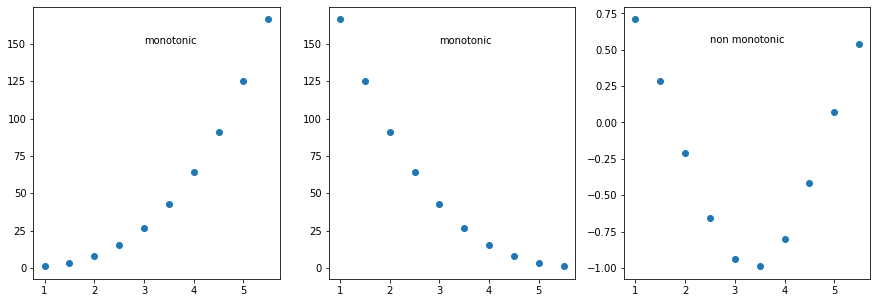

In [4]:
# displaying scatter plot for understanding ot monotonic relation between the two variables.

plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,3,1)
ax1.scatter(x1, y1)
ax1.text(3,150, 'monotonic')


ax2 = plt.subplot(1,3,2)
ax2.scatter(x2, y2)
ax2.text(3,150, 'monotonic')

ax3 = plt.subplot(1,3,3)
ax3.scatter(x2, np.cos(x1))
ax3.text(2.5,0.55, 'non monotonic')


# Mathematics Behind Spearman's Correlation

*  Spearman's Correlation is based on the rank of variables.
*  we need to set the rank for each variable.
Consider the following example.


# Example:
*  we have a student dataset that contains marks of the students.

In [5]:
english = np.array([67,89,88,90,95])
maths = np.array([77,86,98,95,87])

d = {'english':english, 'maths':maths}


In [6]:
data = pd.DataFrame(d)
data

,english,maths
0,67,77
1,89,86
2,88,98
3,90,95
4,95,87


*  creating rank columns for both english and maths

In [9]:
english_rank = np.array([1,3,2,4,5])
maths_rank = np.array([1,2,5,4,3])

In [10]:
data['english_rank'] = english_rank
data['maths_rank'] = maths_rank
data

,english,maths,english_rank,maths_rank
0,67,77,1,1
1,89,86,3,2
2,88,98,2,5
3,90,95,4,4
4,95,87,5,3


# Formulas

1. This formula use only when if there are no duplicate observations available.

>$ \rho = 1 - \frac{\sigma\sum{d_i^2}}{n(n^2-1)}$ 

2. This formula use only when if there  are duplicate observations available.

>$ \rho = \frac{\sum(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum(x_i-\overline{x})^2(y_i-\overline{y})^2}}$

In [11]:
data['d'] = data['english_rank'] -data['maths_rank']
data['d2'] = data['d']**2


In [12]:
data

,english,maths,english_rank,maths_rank,d,d2
0,67,77,1,1,0,0
1,89,86,3,2,1,1
2,88,98,2,5,-3,9
3,90,95,4,4,0,0
4,95,87,5,3,2,4


In [14]:
sc = 1 - (6*data['d2'].sum() / ( len(data.index) * ( len(data.index)**2  -1)) )

In [15]:
# sc gives the relationship between ranks of two individual features.
sc

0.30000000000000004

# Implementation using scipy

In [39]:
# f_classif is used to find speraman's correlation.
# SelectKBest is used to select k best features.

from sklearn.feature_selection import SelectKBest
from scipy.stats import spearmanr

In [40]:
skb = SelectKBest(score_func=spearmanr, k=1)

In [41]:
X = data[['english']]
y = data['maths']


In [42]:
skb.fit(X, y)

SelectKBest(k=1, score_func=<function spearmanr at 0x7f3d563c15f0>)

In [43]:
skb.scores_

array(0.3)